# Q1).Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
# Draw the inferences from the clusters obtained.

# Data Description:
 
# The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

# ID --Unique ID

# Balance--Number of miles eligible for award travel

# Qual_mile--Number of miles counted as qualifying for Topflight status

# cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:
# cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:
# cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

# 1 = under 5,000
# 2 = 5,000 - 10,000
# 3 = 10,001 - 25,000
# 4 = 25,001 - 50,000
# 5 = over 50,000

# Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

# Bonus_trans--Number of non-flight bonus transactions in the past 12 months

# Flight_miles_12mo--Number of flight miles in the past 12 months

# Flight_trans_12--Number of flight transactions in the past 12 months

# Days_since_enrolled--Number of days since enrolled in flier program

# Award--whether that person had award flight (free flight) or not

In [1]:
#Importing pandas and loading data

In [2]:
import pandas as pd
df = pd.read_excel('EastWestAirlines.xlsx',sheet_name=1)
df.to_csv('EastWestAirlines.csv',index=False)
df1 = pd.read_csv('EastWestAirlines.csv')
df1

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [3]:
#Performing EDA

In [4]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
ID#,3999.0,2014.819455,1160.764358,1.0,1010.5,2016.0,3020.5,4021.0
Balance,3999.0,73601.327582,100775.664958,0.0,18527.5,43097.0,92404.0,1704838.0
Qual_miles,3999.0,144.114529,773.663804,0.0,0.0,0.0,0.0,11148.0
cc1_miles,3999.0,2.059515,1.376919,1.0,1.0,1.0,3.0,5.0
cc2_miles,3999.0,1.014504,0.147650,1.0,1.0,1.0,1.0,3.0
cc3_miles,3999.0,1.012253,0.195241,1.0,1.0,1.0,1.0,5.0
Bonus_miles,3999.0,17144.846212,24150.967826,0.0,1250.0,7171.0,23800.5,263685.0
Bonus_trans,3999.0,11.601900,9.603810,0.0,3.0,12.0,17.0,86.0
Flight_miles_12mo,3999.0,460.055764,1400.209171,0.0,0.0,0.0,311.0,30817.0
Flight_trans_12,3999.0,1.373593,3.793172,0.0,0.0,0.0,1.0,53.0


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [6]:
#perform hierarchical clustering on our data

In [7]:
from sklearn.cluster import AgglomerativeClustering
acs = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='single')
Y = acs.fit_predict(df1)
Y.shape

(3999,)

In [8]:
#converted the cluster labels (Y) to a DataFrame Y_new and then used value_counts() to get the count of each unique cluster labe

In [9]:
Y_new = pd.DataFrame(Y)
Y_new[0].value_counts()

0    3993
1       3
4       1
2       1
3       1
Name: 0, dtype: int64

In [10]:
#visualize a dendrogram for hierarchical clustering.

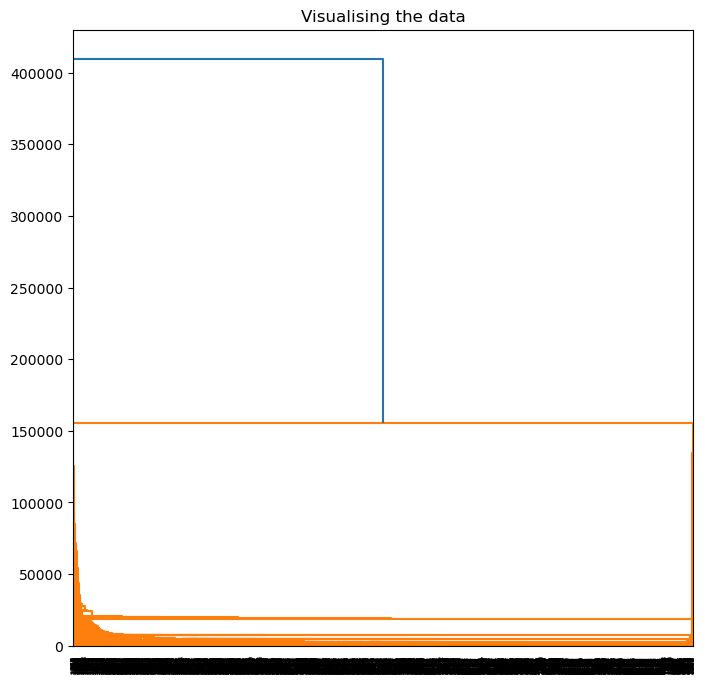

In [11]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.metrics import silhouette_score


plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(df1, method ='single')))

In [12]:
silhouette_score(df1,Y)

0.8927034119906091

In [13]:
#AgglomerativeClustering with different configuration, specifying five clusters (n_clusters=5), using Euclidean distance as the affinity metric (affinity='euclidean'), and complete linkage as the linkage criterion 

In [14]:
from sklearn.cluster import AgglomerativeClustering
acc = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='complete')
Y2 = acc.fit_predict(df1)
Y2

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [15]:
#created a DataFrame Y2_new to store the cluster labels (Y2) and then used value_counts() to get the count of each unique cluster label.

In [16]:
Y2_new = pd.DataFrame(Y2,columns=['clusters'])
Y2_new.value_counts()

clusters
1           3835
2            138
0             21
4              4
3              1
dtype: int64

In [17]:
#concatenated the original DataFrame df1 with the cluster labels from Y2_new, creating a new DataFrame df1_new

In [18]:
df1_new = pd.concat([df1,Y2_new],axis=1)
df1_new

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1


In [19]:
#visualizing a dendrogram for hierarchical clustering using the complete linkage method

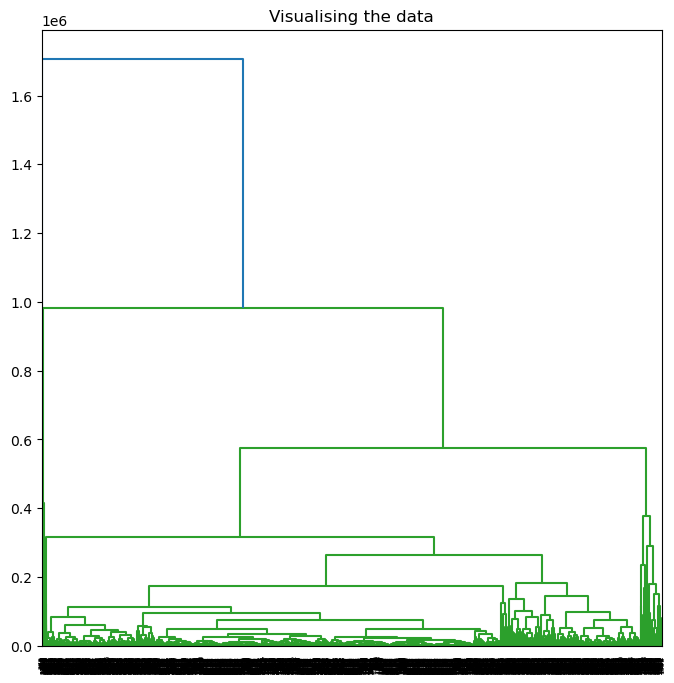

In [20]:
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(df1, method ='complete')))

In [21]:
silhouette_score(df1,Y2)

0.7471643765929803

In [22]:
#AgglomerativeClustering with different configuration, specifying five clusters (n_clusters=5), using Euclidean distance as the affinity metric (affinity='euclidean'), and complete linkage as the linkage criterion 

In [23]:
from sklearn.cluster import AgglomerativeClustering
aca = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='average')
Y3 = aca.fit_predict(df1)
Y3

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [24]:
#created a DataFrame Y3_new to store the cluster labels (Y3) and then used value_counts() to get the count of each unique cluster label.

In [25]:
Y3_new = pd.DataFrame(Y3,columns=['clusters'])
Y3_new.value_counts()

clusters
0           3961
2             28
4              5
1              4
3              1
dtype: int64

In [26]:
#concatenated the original DataFrame df1 with the cluster labels from Y3_new, creating a new DataFrame df1_new

In [27]:
df1_new = pd.concat([df1,Y3_new],axis=1)
df1_new

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [28]:
#visualizing a dendrogram for hierarchical clustering using the complete linkage method

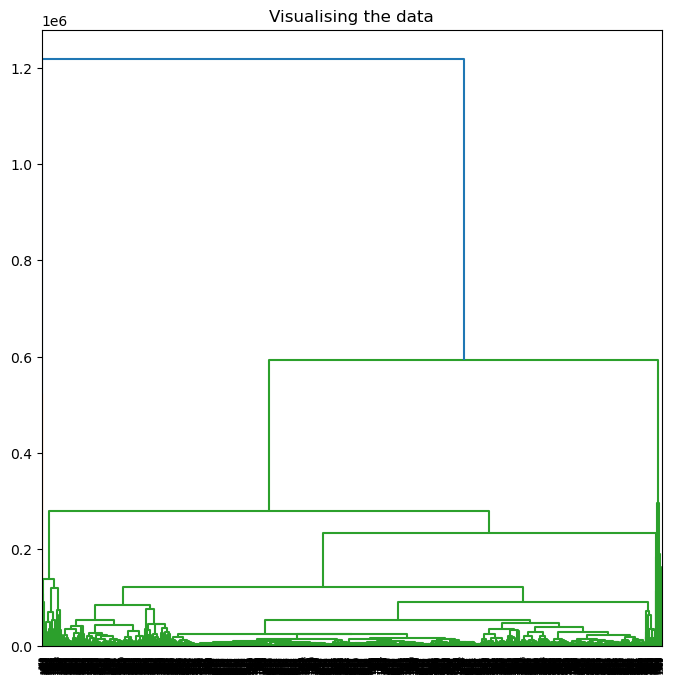

In [29]:
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(df1, method ='average')))

In [30]:
silhouette_score(df1,Y3)

0.8359671672245398

In [31]:
#AgglomerativeClustering with different configuration, specifying five clusters (n_clusters=5), using Euclidean distance as the affinity metric (affinity='euclidean'), and complete linkage as the linkage criterion 

In [32]:
acw = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
Y4 = acw.fit_predict(df1)
Y4

array([3, 3, 3, ..., 1, 3, 3], dtype=int64)

In [33]:
#created a DataFrame Y4_new to store the cluster labels (Y4) and then used value_counts() to get the count of each unique cluster label.

In [34]:
Y4_new = pd.DataFrame(Y4,columns=['clusters'])
Y4_new.value_counts()

clusters
3           2122
1           1488
2            290
4             73
0             26
dtype: int64

In [35]:
#concatenated the original DataFrame df1 with the cluster labels from Y4_new, creating a new DataFrame df1_new

In [36]:
df1_new = pd.concat([df1,Y4_new],axis=1)
df1_new

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,3
1,2,19244,0,1,1,1,215,2,0,0,6968,0,3
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,3
3,4,14776,0,1,1,1,500,1,0,0,6952,0,3
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,3
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,3


In [37]:
#visualizing a dendrogram for hierarchical clustering using the complete linkage method

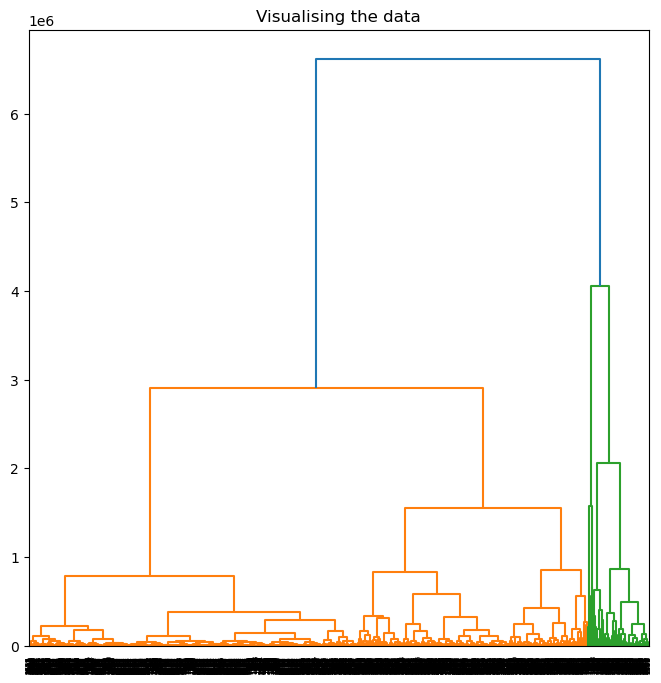

In [38]:
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(df1, method ='ward')))

In [39]:
silhouette_score(df1,Y4)

0.49091505143321534

# Silhouette scores of AGGLOMERATIVE CLUSTERING

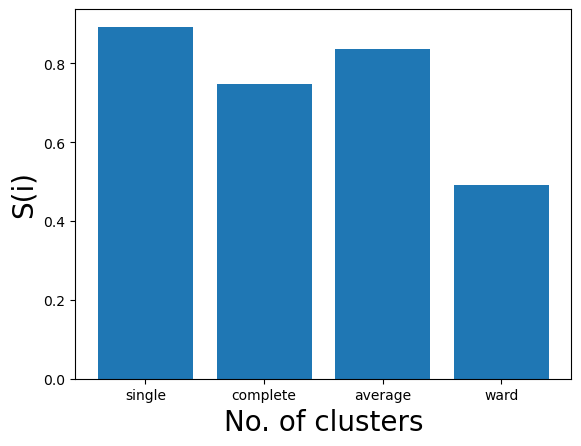

In [40]:
k = ['single','complete','average','ward']
silhouette_scores = []
silhouette_scores.append(silhouette_score(df1,Y))
silhouette_scores.append(silhouette_score(df1,Y2))
silhouette_scores.append(silhouette_score(df1,Y3))
silhouette_scores.append(silhouette_score(df1,Y4))

plt.bar(k,silhouette_scores)
plt.xlabel('No. of clusters',fontsize=20)
plt.ylabel('S(i)',fontsize=20)
plt.show()

# After analysing the silhouette scores, it is clear that average linkage method is closer to 1 where the clusters are dense and accurate.

# KMEANS CLUSTERING

In [41]:
#created a DataFrame Y1_new to store the cluster labels (Y1) and used value_counts() to get the count of each unique cluster label.

In [42]:
from sklearn.cluster import KMeans
import pandas as pd

# Assuming df1 is a valid DataFrame with the same features used for training the model
km1 = KMeans(n_clusters=2)
km1.fit(df1)

Y1 = km1.predict(df1)
Y1_new = pd.DataFrame(Y1, columns=['clusters'])
print(Y1_new.value_counts())

clusters
1           3668
0            331
dtype: int64


In [43]:
silhouette_score(df1,Y1)

0.7417389972205697

In [44]:
#created a DataFrame Y2_new to store the cluster labels (Y2) and used value_counts() to get the count of each unique cluster label.

In [45]:
km2 = KMeans(n_clusters=3)
km2.fit(df1)
Y2 = km2.predict(df1)
Y2_new = pd.DataFrame(Y2,columns=['clusters'])
Y2_new.value_counts()

clusters
0           3242
2            707
1             50
dtype: int64

In [46]:
silhouette_score(df1,Y2)

0.6493060301677293

In [47]:
#created a DataFrame Y3_new to store the cluster labels (Y3) and used value_counts() to get the count of each unique cluster label.

In [48]:
from sklearn.cluster import KMeans
km3 = KMeans(n_clusters=4)
km3.fit(df1)

KMeans(n_clusters=4)

In [49]:
Y3 = km3.predict(df1)
Y3_new = pd.DataFrame(Y3,columns=['clusters'])
Y3_new.value_counts()

clusters
0           2808
2            980
1            185
3             26
dtype: int64

In [50]:
silhouette_score(df1,Y3)

0.5901962574837638

In [51]:
km3.inertia_

7554668286111.57

In [52]:
#calculating the inertia for each number of clusters. Our goal seems to be finding an appropriate number of clusters based on the average inertia

In [53]:
import numpy as np
l1 = []
for i in range(1,15):
    kmeans = KMeans(n_clusters = i)
    kmeans = kmeans.fit(df1)
    l1.append(kmeans.inertia_)
    
print(np.mean(l1))

8162385000800.577


In [54]:
df1_new = pd.concat([df1,Y3_new],axis=1)
df1_new

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [55]:
#created a DataFrame Y4_new to store the cluster labels (Y4) and used value_counts() to get the count of each unique cluster label.

In [56]:
km4 = KMeans(n_clusters=5)
km4.fit(df1)
Y4 = km4.predict(df1)
Y4_new = pd.DataFrame(Y4,columns=['clusters'])
Y4_new.value_counts()

clusters
0           2500
3           1050
1            342
4             88
2             19
dtype: int64

In [57]:
silhouette_score(df1,Y4)

0.541520482890177

# Silhouette scores of KMEANS

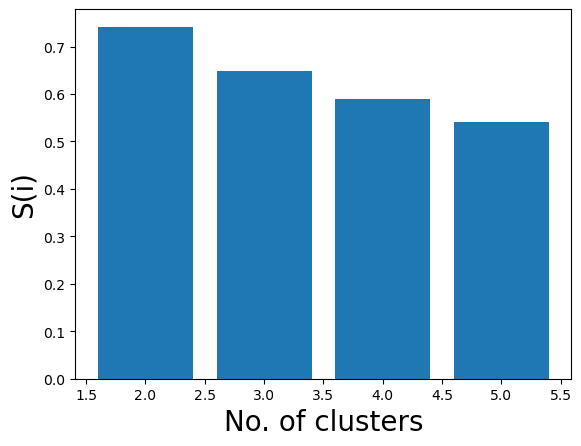

In [58]:
L = [2,3,4,5]
silhouette_scores = []
silhouette_scores.append(silhouette_score(df1,Y1))
silhouette_scores.append(silhouette_score(df1,Y2))
silhouette_scores.append(silhouette_score(df1,Y3))
silhouette_scores.append(silhouette_score(df1,Y4))

plt.bar(L,silhouette_scores)
plt.xlabel('No. of clusters',fontsize=20)
plt.ylabel('S(i)',fontsize=20)
plt.show()

# From the above silhouette scores n_clusters=2 has more silhouette score than the other cluster values so, in clusters value 2 have more dense and accurate clusters than the other.

# DBSCAN CLUSTERING

In [59]:
#standardize your data then created a new DataFrame ss_df1 to store the standardized data, preserving the original column names

In [60]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss_df1 = ss.fit_transform(df1)
ss_df1 = pd.DataFrame(ss_df1)
ss_df1.columns = list(df1)
ss_df1

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-1.735125,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-1.734263,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-1.733402,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-1.732540,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,-1.731679,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,1.725097,-0.547079,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120,1.303918
3995,1.725958,-0.091465,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994,1.303918
3996,1.726820,-0.000043,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096,-0.328603,-0.362168,-1.315604,1.303918
3997,1.727682,-0.185607,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,0.028531,-0.098503,-1.316088,-0.766919


In [61]:
#applied (DBSCAN) to your standardized data (ss_df1)

In [62]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.2,min_samples=5)
dbscan.fit(ss_df1)

DBSCAN(eps=0.2)

In [63]:
Y = dbscan.labels_
Y

array([ 0,  0, -1, ..., -1, -1, 13], dtype=int64)

In [64]:
#created a DataFrame Y_new to store the cluster labels Y , and then you used value_counts() to count the occurrences of each unique cluster label

In [65]:
Y_new = pd.DataFrame(Y,columns=['clusters'])
Y_new.value_counts(sort=True)

clusters
-1          3174
 1           653
 13           60
 11           14
 0            13
 2            12
 3            11
 10           10
 9             9
 5             8
 14            5
 12            5
 7             5
 8             5
 6             5
 4             5
 15            5
dtype: int64

In [66]:
#calculating the silhouette score for the clusters

In [67]:
from sklearn.metrics import silhouette_score
silhouette_score(ss_df1,Y)

-0.41096312362369963

In [68]:
#concatenated the original feature matrix df1 with the cluster labels from Y_new, creating a new DataFrame df1_new

In [69]:
df1_new = pd.concat([df1,Y_new],axis=1)
df1_new

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,-1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,-1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,-1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,-1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,-1


In [70]:
# applied the DBSCAN algorithm again with different parameters to your standardized data then created a new set of cluster labels Y2 and a DataFrame Y2_new to store these labels.

In [71]:
dbscan = DBSCAN(eps=0.4,min_samples=5)
dbscan.fit(ss_df1)
Y2 = dbscan.labels_
Y2_new = pd.DataFrame(Y2,columns=['clusters'])
Y2_new.value_counts()
silhouette_score(ss_df1,Y2)

-0.4203292592355581

In [72]:
# applied the DBSCAN algorithm again with different parameters to your standardized data then created a new set of cluster labels Y3 and a DataFrame Y3_new to store these labels.

In [73]:
dbscan = DBSCAN(eps=0.6,min_samples=5)
dbscan.fit(ss_df1)
Y3 = dbscan.labels_
Y3_new = pd.DataFrame(Y3,columns=['clusters'])
Y3_new.value_counts()
silhouette_score(ss_df1,Y3)

-0.13576641720764085

In [74]:
# applied the DBSCAN algorithm again with different parameters to your standardized data then created a new set of cluster labels Y4 and a DataFrame Y4_new to store these labels.

In [75]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.8,min_samples=5)
dbscan.fit(ss_df1)
Y4 = dbscan.labels_
Y_4new = pd.DataFrame(Y4,columns=['clusters'])
Y4_new.value_counts()
silhouette_score(ss_df1,Y4)

-0.011302546565510172

In [76]:
df_new = pd.concat([df1,Y4_new],axis=1)
df_new

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,3
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [77]:
# applied the DBSCAN algorithm again with different parameters to your standardized data then created a new set of cluster labels Y5 and a DataFrame Y5_new to store these labels.

In [78]:
dbscan = DBSCAN(eps=1.0,min_samples=5)
dbscan.fit(ss_df1)
Y5 = dbscan.labels_
Y5_new = pd.DataFrame(Y5,columns=['clusters'])
Y5_new.value_counts()
silhouette_score(ss_df1,Y5)

0.14394227852839997

# Silhouette Scores for DBSCAN Clustering

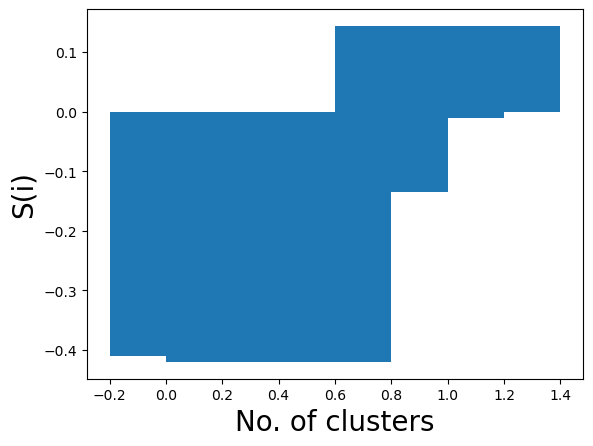

In [79]:
D = [0.2,0.4,0.6,0.8,1.0]
silhouette_scores = []
silhouette_scores.append(silhouette_score(ss_df1,Y))
silhouette_scores.append(silhouette_score(ss_df1,Y2))
silhouette_scores.append(silhouette_score(ss_df1,Y3))
silhouette_scores.append(silhouette_score(ss_df1,Y4))
silhouette_scores.append(silhouette_score(ss_df1,Y5))

plt.bar(D,silhouette_scores)
plt.xlabel('No. of clusters',fontsize=20)
plt.ylabel('S(i)',fontsize=20)
plt.show()

# After analysing silhouette scores for dbscan clustering model,the value for eps=1 is better than the rest of the eps values for dbscan values.

# Q2).Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

# Data Description:
# Murder -- Muder rates in different places of United States
# Assualt- Assualt rate in different places of United States
# UrbanPop - urban population in different places of United States
# Rape - Rape rate in different places of United States

In [80]:
#Importing pandas and Loading data

In [81]:
import pandas as pd
df2 = pd.read_csv('crime_data.csv')
df2.shape
df2.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [82]:
#Performing EDA

In [83]:
df2.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [84]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [85]:
df2.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


In [86]:
df = df2.iloc[:,1:]
df.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


# HIERARCHICAL CLUSTERING

In [87]:
#applied (AgglomerativeClustering) to your original data (df) used the Euclidean distance as the affinity metric, and set the linkage criterion to 'single'. You then created a DataFrame Y_new

In [88]:
from sklearn.cluster import AgglomerativeClustering
acs = AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='single')
Y = acs.fit_predict(df)
Y_new = pd.DataFrame(Y,columns=['clusters'])
Y_new.value_counts()

clusters
0           47
1            1
2            1
3            1
dtype: int64

In [89]:
# concatenated the original DataFrame df2 with the cluster labels from Y_new, creating a new DataFrame df_new.

In [90]:
df_new = pd.concat([df2,Y_new],axis=1)
df_new.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusters
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0


In [91]:
#The dendrogram visualizes the hierarchical relationships between data points. 

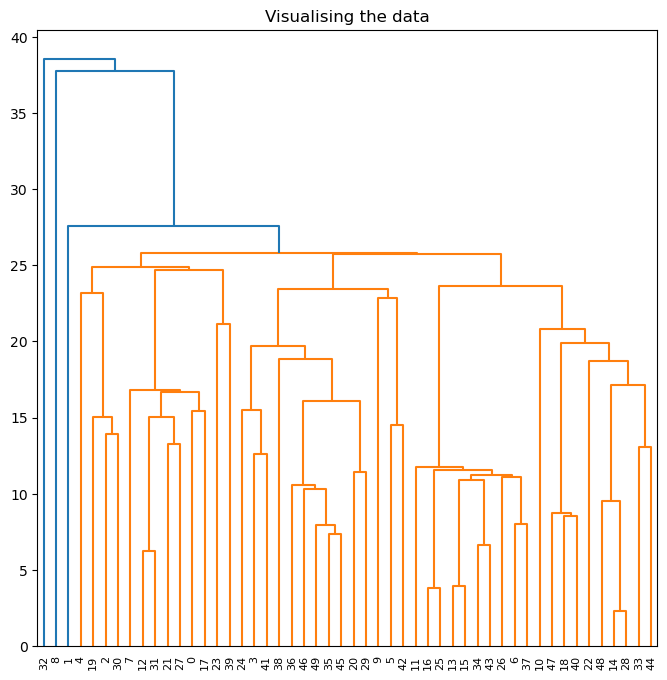

In [92]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.metrics import silhouette_score


plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(df, method ='single')))

In [93]:
silhouette_score(df,Y)

0.0659579288128367

In [94]:
#applied (AgglomerativeClustering) to your original data (df) used the Euclidean distance as the affinity metric, and set the linkage criterion to 'single'. You then created a DataFrame Y2_new

In [95]:
from sklearn.cluster import AgglomerativeClustering
aca = AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='average')
Y2 = aca.fit_predict(df)
Y2_new = pd.DataFrame(Y2,columns=['clusters'])
Y2_new.value_counts()

clusters
0           20
1           14
2           14
3            2
dtype: int64

In [96]:
# concatenated the original DataFrame df2 with the cluster labels from Y2_new, creating a new DataFrame df2_new.

In [97]:
df2_new = pd.concat([df2,Y2_new],axis=1)
df2_new.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusters
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,1


In [98]:
#The dendrogram visualizes the hierarchical relationships between data points. 

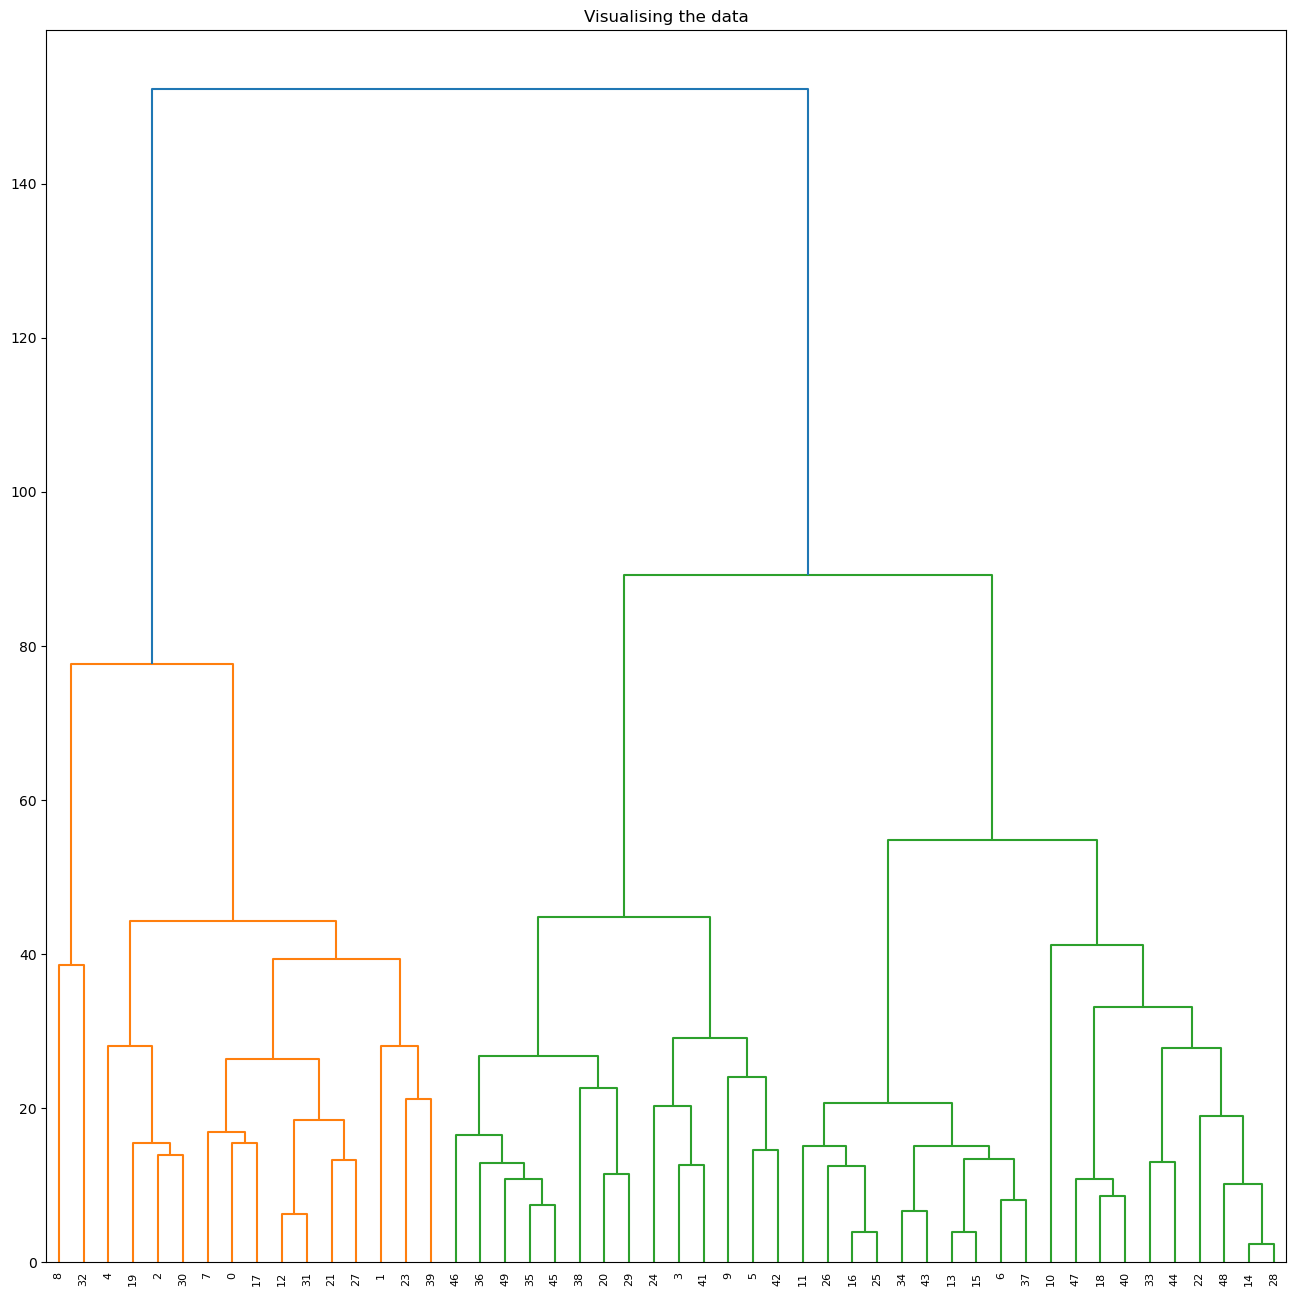

In [99]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.metrics import silhouette_score


plt.figure(figsize =(16,16))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(df, method ='average')))

In [100]:
silhouette_score(df,Y2)

0.49995555523087537

In [101]:
#applied (AgglomerativeClustering) to your original data (df) used the Euclidean distance as the affinity metric, and set the linkage criterion to 'single'. You then created a DataFrame Y3_new

In [102]:
from sklearn.cluster import AgglomerativeClustering
acc = AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='complete')
Y3 = acc.fit_predict(df)
Y3_new = pd.DataFrame(Y3,columns=['clusters'])
Y3_new.value_counts()

clusters
0           20
1           14
2           14
3            2
dtype: int64

In [103]:
# concatenated the original DataFrame df2 with the cluster labels from Y3_new, creating a new DataFrame df_new.

In [104]:
df_new = pd.concat([df2,Y3_new],axis=1)
df_new.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusters
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,1


In [105]:
#The dendrogram visualizes the hierarchical relationships between data points. 

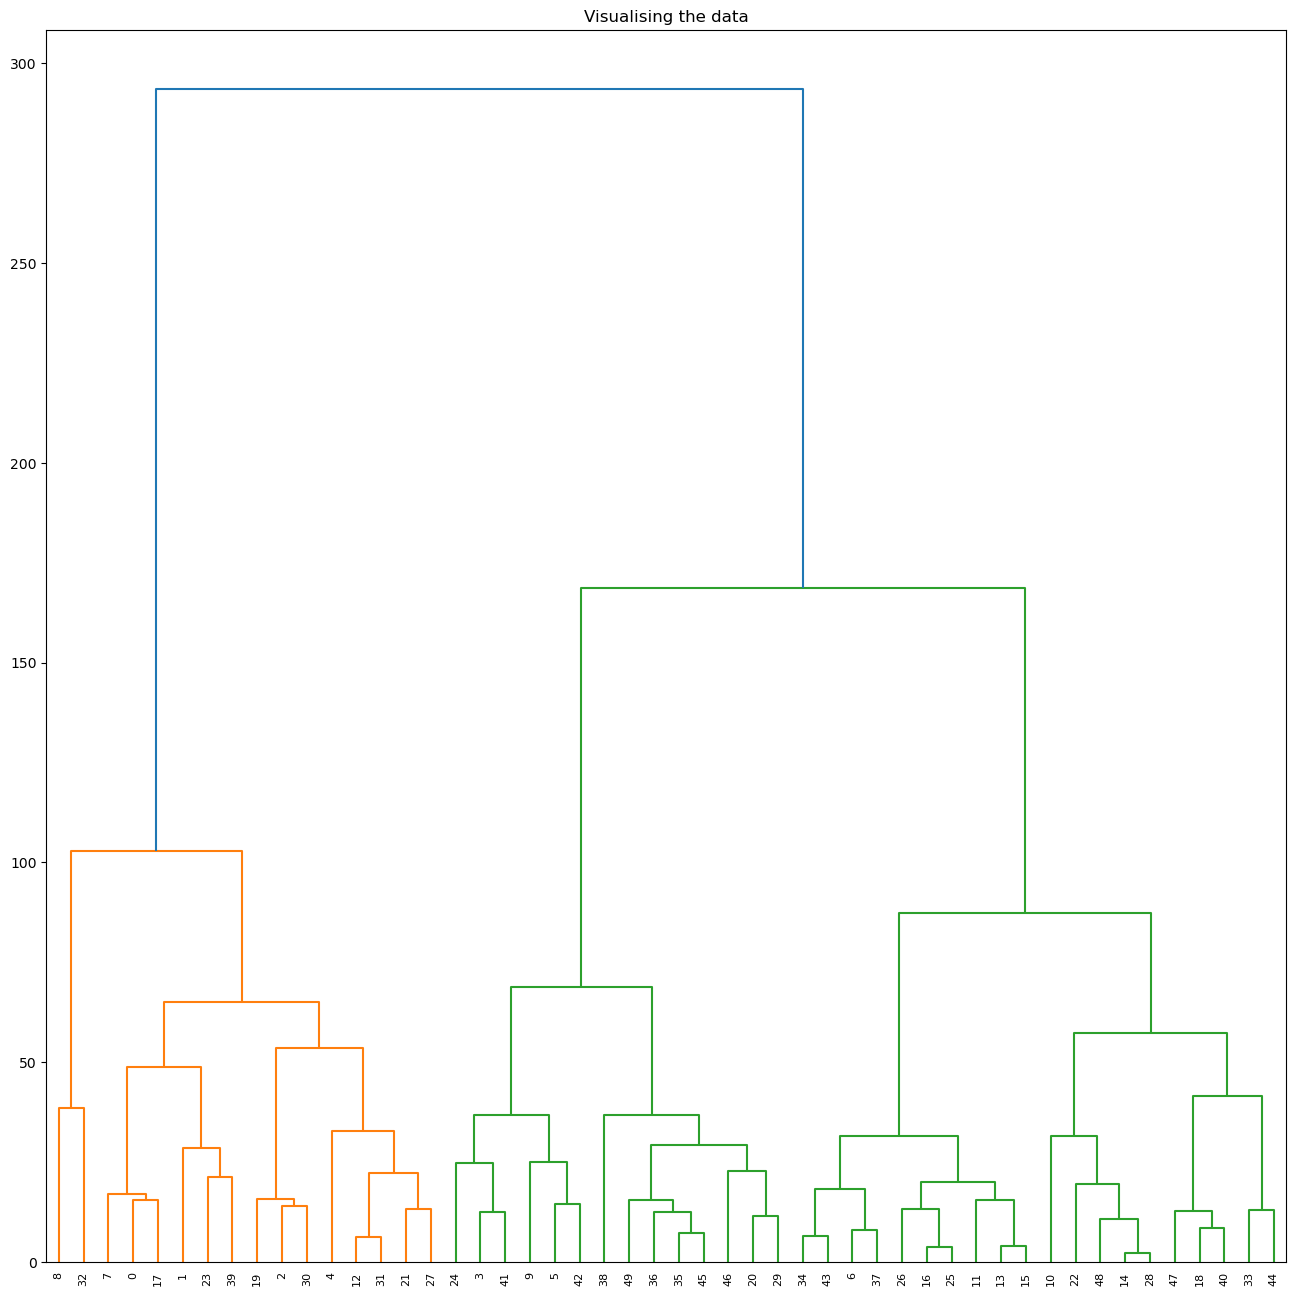

In [106]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.metrics import silhouette_score


plt.figure(figsize =(16, 16))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(df, method ='complete')))

In [107]:
silhouette_score(df,Y3)

0.49995555523087537

In [108]:
#applied (AgglomerativeClustering) to your original data (df) used the Euclidean distance as the affinity metric, and set the linkage criterion to 'single'. You then created a DataFrame Y4_new

In [109]:
from sklearn.cluster import AgglomerativeClustering
acw = AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='ward')
Y4 = acw.fit_predict(df)
Y4_new = pd.DataFrame(Y4,columns=['clusters'])
Y4_new.value_counts()

clusters
0           16
2           14
1           10
3           10
dtype: int64

In [110]:
# concatenated the original DataFrame df2 with the cluster labels from Y_new, creating a new DataFrame df4_new.

In [111]:
df4_new = pd.concat([df2,Y4_new],axis=1)
df4_new.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusters
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,0


In [112]:
#The dendrogram visualizes the hierarchical relationships between data points. 

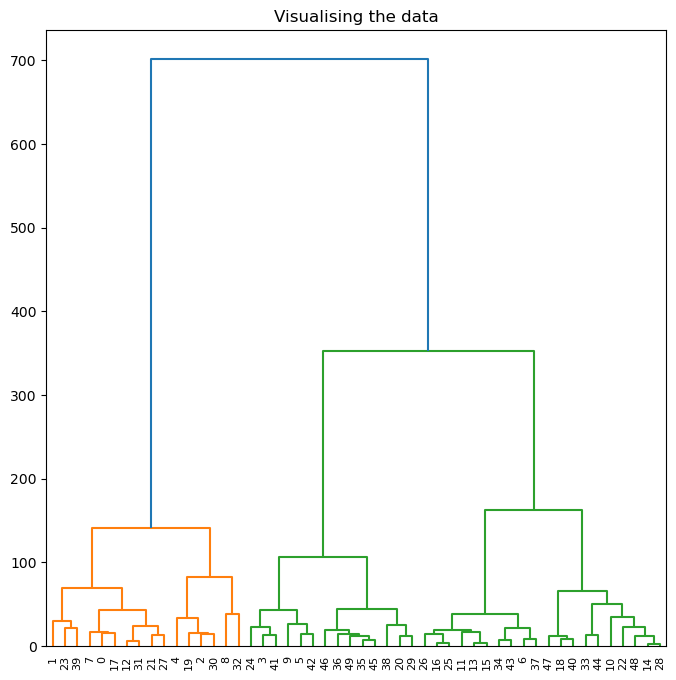

In [113]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.metrics import silhouette_score


plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(df, method ='ward')))

In [114]:
silhouette_score(df,Y4)

0.5012332370891494

# silhouette Scores for Agglomerative Clustering

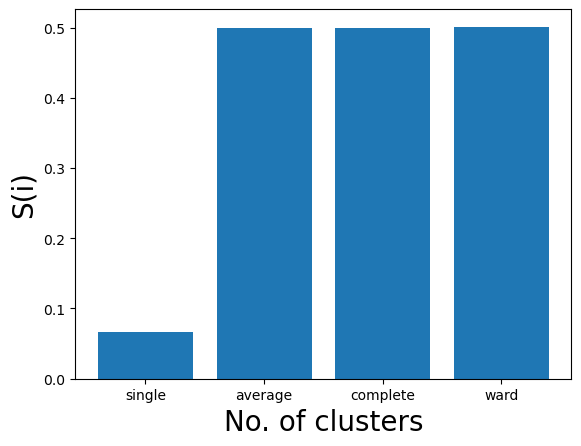

In [115]:
A = ['single','average','complete','ward']
silhouette_scores = []
silhouette_scores.append(silhouette_score(df,Y))
silhouette_scores.append(silhouette_score(df,Y2))
silhouette_scores.append(silhouette_score(df,Y3))
silhouette_scores.append(silhouette_score(df,Y4))

plt.bar(A,silhouette_scores)
plt.xlabel('No. of clusters',fontsize=20)
plt.ylabel('S(i)',fontsize=20)
plt.show()

# After analysing the following silhouette scores of Agglomerative clustering, the values of average,complete and ward are better than single linkages.

# KMEANS CLUSTERING

In [116]:
 #applied the KMeans to our original data (df), specified the number of clusters as 2, and then fit the model to our data. 

In [117]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(df)

KMeans(n_clusters=2)

In [118]:
#predict the cluster labels for each data point in your original data (df). You've created a DataFrame Y1_new and applied value count

In [119]:
Y1 = kmeans.predict(df)
Y1_new = pd.DataFrame(Y1,columns=['clusters'])
Y1_new.value_counts()

clusters
0           29
1           21
dtype: int64

In [120]:
#concatenated the original DataFrame df2 with the cluster labels obtained from the KMeans model (Y1_new), creating a new DataFrame df_new

In [121]:
df_new = pd.concat([df2,Y1_new],axis=1)
df_new.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusters
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,1


In [122]:
kmeans.inertia_

96399.02814449919

In [123]:
silhouette_score(df,Y1)

0.592655441935794

In [124]:
# Suppress warnings and determine the optimal number of clusters for KMeans

In [125]:
import warnings
warnings.filterwarnings('ignore')
l1 = []
for i in range(1,15):
    kmeans = KMeans(n_clusters = i)
    kmeans = kmeans.fit(df)
    l1.append(kmeans.inertia_)
    
print(np.mean(l1))

47134.95205969779


In [126]:
#predict the cluster labels for each data point in your original data (df). You've created a DataFrame Y2_new and applied value count and evalute performance

In [127]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)
Y2 = kmeans.predict(df)
Y2_new = pd.DataFrame(Y2,columns=['clusters'])
Y2_new.value_counts()
silhouette_score(df,Y2)

0.5319024108339817

In [128]:
#predict the cluster labels for each data point in your original data (df). You've created a DataFrame Y3_new and applied value count and evalute performance

In [129]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(df)
Y3 = kmeans.predict(df)
Y3_new = pd.DataFrame(Y3,columns=['clusters'])
Y3_new.value_counts()
silhouette_score(df,Y3)

0.5012332370891494

In [130]:
#predict the cluster labels for each data point in your original data (df). You've created a DataFrame Y4_new and applied value count and evalute performance

In [131]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(df)
Y4 = kmeans.predict(df)
Y4_new = pd.DataFrame(Y4,columns=['clusters'])
Y4_new.value_counts()
silhouette_score(df,Y4)

0.44929501828815677

In [132]:
#predict the cluster labels for each data point in your original data (df). You've created a DataFrame Y5_new and applied value count and evalute performance

In [133]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6)
kmeans.fit(df)
Y5 = kmeans.predict(df)
Y5_new = pd.DataFrame(Y5,columns=['clusters'])
Y5_new.value_counts()
silhouette_score(df,Y5)

0.44994809798886365

# Silhouette Scores for KMEANS

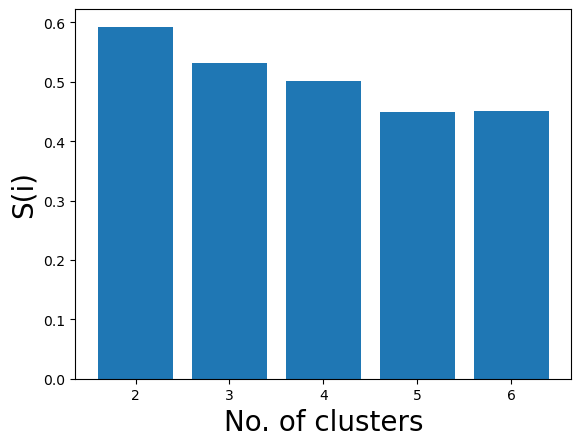

In [134]:
KM = [2,3,4,5,6]
silhouette_scores = []
silhouette_scores.append(silhouette_score(df,Y1))
silhouette_scores.append(silhouette_score(df,Y2))
silhouette_scores.append(silhouette_score(df,Y3))
silhouette_scores.append(silhouette_score(df,Y4))
silhouette_scores.append(silhouette_score(df,Y5))

plt.bar(KM,silhouette_scores)
plt.xlabel('No. of clusters',fontsize=20)
plt.ylabel('S(i)',fontsize=20)
plt.show()

# After analysing the following silhouette scores for Kmeans clustering model, the value for 2 is higher than the rest of eps values.

# DBSCAN CLUSTERING

In [135]:
#applied standard scaling to your original DataFrame df

In [136]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss_df = ss.fit_transform(df)
ss_df = pd.DataFrame(ss_df)
ss_df.columns = list(df)
ss_df.head()
ss_df.shape

(50, 4)

In [137]:
#applied the DBSCAN clustering algorithm to your scaled DataFrame ss_df. The resulting cluster labels are stored in the array Y1

In [138]:
from sklearn.cluster import DBSCAN
dbs = DBSCAN(eps=1,min_samples=8)
dbs.fit(ss_df)
Y1 = dbs.labels_
Y1

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0,  0,  0, -1,
       -1,  0, -1, -1, -1,  0, -1, -1,  0,  0, -1,  0, -1, -1, -1, -1,  0,
        0,  0, -1,  0, -1, -1,  0, -1, -1, -1, -1,  0,  0, -1,  0,  0],
      dtype=int64)

In [139]:
#reated a DataFrame Y1_new to store the DBSCAN cluster labels (Y1) and used value_counts() to count the occurrences of each unique cluster label

In [140]:
Y1_new = pd.DataFrame(Y1,columns=['clusters'])
Y1_new.value_counts()

clusters
-1          32
 0          18
dtype: int64

In [141]:
#concatenated the original DataFrame df2 with the cluster labels obtained from the DBSCAN algorithm (Y1_new), creating a new DataFrame df1_new. 

In [142]:
df1_new = pd.concat([df2,Y1_new],axis=1)
df1_new.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusters
0,Alabama,13.2,236,58,21.2,-1
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,-1
3,Arkansas,8.8,190,50,19.5,-1
4,California,9.0,276,91,40.6,-1


In [143]:
silhouette_score(ss_df,Y1)

0.20055040176230435

In [144]:
db = DBSCAN(eps=1.5,min_samples=8)
db.fit(ss_df)

DBSCAN(eps=1.5, min_samples=8)

In [145]:
Y2 = db.labels_
Y2

array([ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [146]:
# created a new DataFrame df2_new by concatenating the original DataFrame df2 with the cluster labels obtained from the DBSCAN algorithm (Y2_new).

In [147]:
Y2_new = pd.DataFrame(Y2,columns=['clusters'])
df2_new = pd.concat([df2,Y2_new],axis=1)
df2_new

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusters
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0


In [148]:
silhouette_score(ss_df,Y2)

0.22521344286760997

In [149]:
#applied the DBSCAN clustering algorithm to your scaled DataFrame ss_df with different hyperparameters and created a DataFrame Y3_new to store and count the occurrences of each unique cluster label. 

In [150]:
dbs = DBSCAN(eps=2,min_samples=8)
dbs.fit(ss_df)
Y3 = dbs.labels_
Y3_new = pd.DataFrame(Y3,columns=['clusters'])
Y3_new.value_counts()

clusters
 0          49
-1           1
dtype: int64

In [151]:
silhouette_score(ss_df,Y3)

0.23455598753159795

# Silhouette scores for Dbscan Clustering

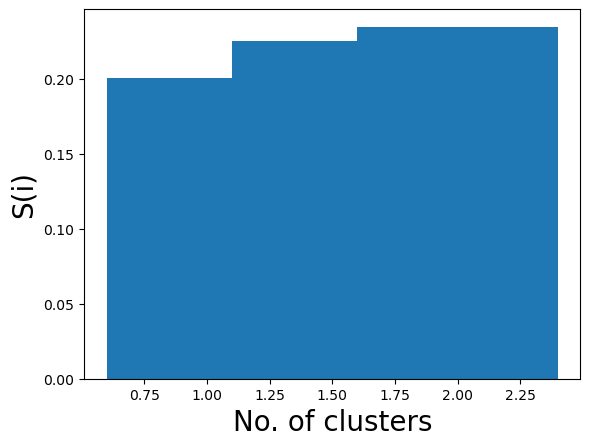

In [152]:
DB = [1,1.5,2]
silhouette_scores=[]
silhouette_scores.append(silhouette_score(ss_df,Y1))
silhouette_scores.append(silhouette_score(ss_df,Y2))
silhouette_scores.append(silhouette_score(ss_df,Y3))

plt.bar(DB,silhouette_scores)
plt.xlabel('No. of clusters',fontsize=20)
plt.ylabel('S(i)',fontsize=20)
plt.show()

# After analysing the silhouette scores for Dbscan clustering models,the eps value for 2.5 is better than the other eps values.However the value for 2.5 eps value is not best for the model.